In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from ydata_profiling import ProfileReport # Auto EDA
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
import pickle

In [6]:
#!pip install ydata_profiling

In [2]:
df = pd.read_csv('loan_approved.csv')

In [8]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [9]:
df.isnull().sum() # checking which columns have how many null values

Loan_ID                    0
Gender                    13
Married                    3
Dependents                15
Education                  0
Self_Employed             32
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                22
Loan_Amount_Term          14
Credit_History            50
Property_Area              0
Loan_Status (Approved)     0
dtype: int64

## Imputation Methods
- Replacing missing values with estimated values.
- Preserves sample size: Doesn’t reduce data points.
- Can introduce bias: Estimated values might not be accurate.
- Here are some common imputation methods:

- Mean, Median, and Mode Imputation:

- Replace missing values with the mean, median, or mode of the relevant variable.
- Simple and efficient: Easy to implement.
- Can be inaccurate: Doesn’t consider the relationships between variables.
- we are explaining the imputation techniques for handling missing values in the ‘Marks’ column of the DataFrame (df). It calculates and fills missing values with the mean, median, and mode of the existing values in that column, and then prints the results for observation.

- Mean Imputation: Calculates the mean of the ‘Marks’ column in the DataFrame (df).
##### df['Marks'].fillna(...): Fills missing values in the ‘Marks’ column with the mean value.
- mean_imputation: The result is stored in the variable mean_imputation.
- Median Imputation: Calculates the median of the ‘Marks’ column in the DataFrame (df).
##### df['Marks'].fillna(...): Fills missing values in the ‘Marks’ column with the median value.
- median_imputation: The result is stored in the variable median_imputation.
- Mode Imputation: Calculates the mode of the ‘Marks’ column in the DataFrame (df). The result is a Series.
###### .iloc[0]: Accesses the first element of the Series, which represents the mode.
###### df['Marks'].fillna(...): Fills missing values in the ‘Marks’ column with the mode value.

### Now we know how to impute the null values from our dataset

## Imputing the null values :

In [3]:
df.loc[df['Gender'].isnull(), 'Gender']="Male" # df.loc[row, column] # We have imputed the null values with the Male

In [14]:
# Or we can use fillna function which mentioned above:
# df['Gender'].fillna("Female", inplace=True)

In [4]:
df['Gender'].isnull().sum()

0

In [5]:
df.loc[df['Dependents'].isnull(), 'Dependents'] = 0

In [11]:
df['Dependents'].isnull().sum()

0

In [13]:
df.loc[df['Self_Employed'].isnull(), 'Self_Employed']="No"

In [15]:
df['Self_Employed'].isnull().sum()

0

In [17]:
df.loc[df['LoanAmount'].isnull(), 'LoanAmount'] = df['LoanAmount'].median()# We have imputed the null values with the median

In [19]:
df.loc[df['Loan_Amount_Term'].isnull(), 'Loan_Amount_Term'] = 360.0

In [21]:
df.loc[df['Credit_History'].isnull(),'Credit_History']=0.0 # We have imputed the null values with the 0

In [25]:
df['Married'].isnull().sum()

3

In [29]:
df.loc[df['Married'].isnull(), 'Married'] = 'No'

In [31]:
df['Married'].isnull().sum()

0

In [33]:
df.isnull().sum()

Loan_ID                   0
Gender                    0
Married                   0
Dependents                0
Education                 0
Self_Employed             0
ApplicantIncome           0
CoapplicantIncome         0
LoanAmount                0
Loan_Amount_Term          0
Credit_History            0
Property_Area             0
Loan_Status (Approved)    0
dtype: int64

## Outliers :

- An outlier is a single data point that goes far outside the average value of a group of statistics.
- Outliers may be exceptions that stand outside individual samples of populations as well.
-  In a more general context, an outlier is an individual that is markedly different from the norm in some respect.
- Outliers are extreme values that differ from most other data points in a dataset. They can have a big impact on your statistical analyses and skew the results of any hypothesis tests.

- It’s important to carefully identify potential outliers in your dataset and deal with them in an appropriate manner for accurate results.

- There are four ways to identify outliers:
1. Sorting method
2. Data visualization method
3. Interquartile range method

## Sorting method
- You can sort quantitative variables from low to high and scan for extremely low or extremely high values. Flag any extreme values that you find.

- This is a simple way to check whether you need to investigate certain data points before using more sophisticated methods.

## Using visualizations
- You can use software to visualize your data with a box plot, or a box-and-whisker plot, so you can see the data distribution at a glance. This type of chart highlights minimum and maximum values (the range), the median, and the interquartile range for your data.

- Many computer programs highlight an outlier on a chart with an asterisk, and these will lie outside the bounds of the graph.

## Statistical outlier detection
- Statistical outlier detection involves applying statistical tests or procedures to identify extreme values.

- You can convert extreme data points into z scores that tell you how many standard deviations away they are from the mean.

- If a value has a high enough or low enough z score, it can be considered an outlier. As a rule of thumb, values with a z score greater than 3 or less than –3 are often determined to be outliers.

## Using the interquartile range
- The interquartile range (IQR) tells you the range of the middle half of your dataset. You can use the IQR to create “fences” around your data and then define outliers as any values that fall outside those fences.
### Interquartile range method

- Sort your data from low to high
- Identify the first quartile (Q1), the median, and the third quartile (Q3).
- Calculate your IQR = Q3 – Q1
- Calculate your upper fence = Q3 + (1.5 * IQR)
- Calculate your lower fence = Q1 – (1.5 * IQR)
- Use your fences to highlight any outliers, all values that fall outside your fences.
- Your outliers are any values greater than your upper fence or less than your lower fence.

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Loan_ID                 614 non-null    object 
 1   Gender                  614 non-null    object 
 2   Married                 611 non-null    object 
 3   Dependents              614 non-null    object 
 4   Education               614 non-null    object 
 5   Self_Employed           614 non-null    object 
 6   ApplicantIncome         614 non-null    int64  
 7   CoapplicantIncome       614 non-null    float64
 8   LoanAmount              614 non-null    float64
 9   Loan_Amount_Term        614 non-null    float64
 10  Credit_History          614 non-null    float64
 11  Property_Area           614 non-null    object 
 12  Loan_Status (Approved)  614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## Visualizing the outliers :

<Axes: xlabel='LoanAmount'>

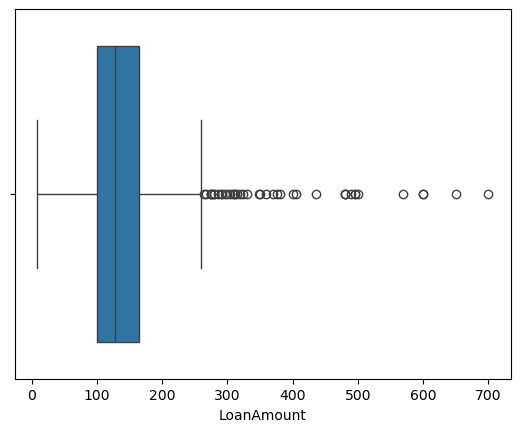

In [30]:
sns.boxplot(x=df.LoanAmount ,orient='h')

<Axes: ylabel='Density'>

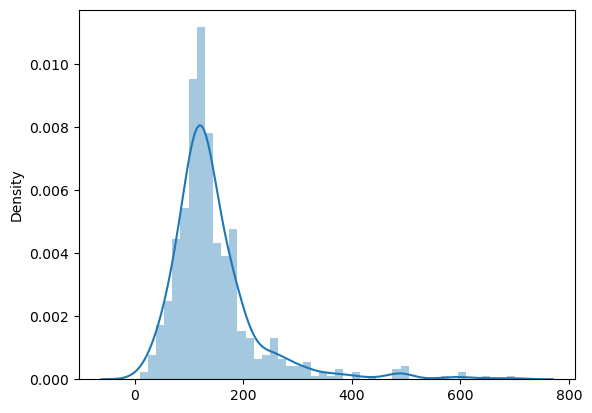

In [31]:
sns.distplot(x=df.LoanAmount)

## Handling the outliers :

## Using Winsorize Method to handle outliers :

In [34]:
# Helps to Trim the outliers based on percentage from both the end of data
# We can set that after this point, we want to remove/trim data

<Axes: xlabel='ApplicantIncome'>

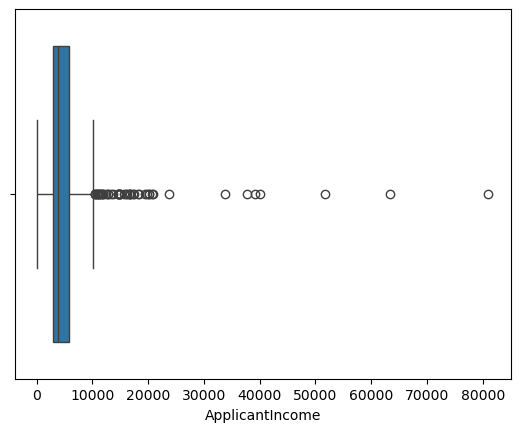

In [35]:
sns.boxplot(x=df.ApplicantIncome)

In [35]:
from scipy.stats.mstats import winsorize
# Specify the percentage of data to be trimmed from both ends
trim_percentage = 0.05

# Winsorize the specific column:
df['ApplicantIncome'] = winsorize(df['ApplicantIncome'], limits=trim_percentage)

<Axes: xlabel='ApplicantIncome'>

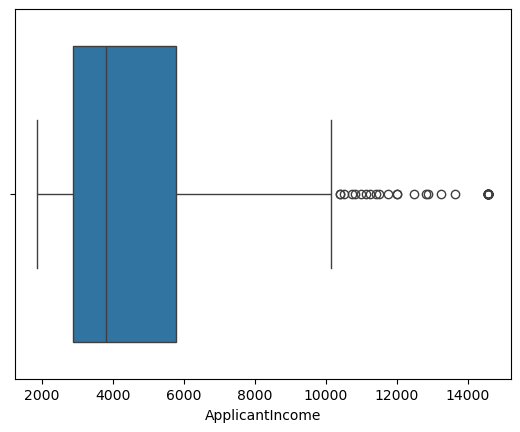

In [37]:
sns.boxplot(x=df.ApplicantIncome)

In [38]:
# NOTE: If too many outliers are there then we don't need to handle outliers. lets say, if outliers are more than 10% then dont handle them

## Now we can be able to see that the outliers were sorted.

## Using IQR method to handle the outliers :

In [39]:
import numpy as np
import pandas as pd

# Calculate quartiles
Q1 = df['LoanAmount'].quantile(0.25)
Q3 = df['LoanAmount'].quantile(0.75)

In [41]:
# Calculate IQR
IQR = Q3 - Q1
IQR

64.5

In [43]:
# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [45]:
print(lower_bound)
print(upper_bound)

3.5
261.5


In [47]:
# Remove outliers
df = df[(df['LoanAmount'] >= lower_bound) & (df['LoanAmount'] <= upper_bound)]

In [46]:
#df

<Axes: xlabel='LoanAmount'>

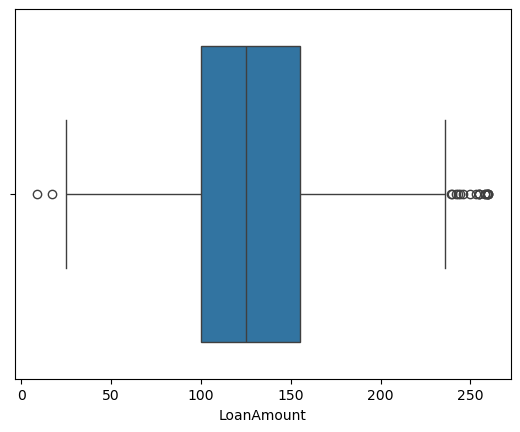

In [49]:
sns.boxplot(x=df.LoanAmount ,orient='h')

## WEcan be able to see that the outliers were sorted.

# PREPROCESSING:

- Data preprocessing is a process of preparing the raw data and making it suitable for a machine learning model.
- It is the first and crucial step while creating a machine learning model.
- When creating a machine learning project, it is not always a case that we come across the clean and formatted data.

### The steps used in data preprocessing include the following:
- Data profiling
- Data profiling is the process of examining, analyzing and reviewing data to collect statistics about its quality.
- Data cleansing.
- Data reduction.
- Data transformation.
- Data validation.

- Data preprocessing transforms the data into a format that is more easily and effectively processed in data mining, machine learning and other data science tasks.
- The techniques are generally used at the earliest stages of the machine learning and AI development pipeline to ensure accurate results.

### There are several different tools and methods used for preprocessing data, including the following:

- sampling, which selects a representative subset from a large population of data;
- transformation, which manipulates raw data to produce a single input;
- denoising, which removes noise from data;
- imputation, which synthesizes statistically relevant data for missing values;
- normalization, which organizes data for more efficient access; and
- feature extraction, which pulls out a relevant feature subset that is significant in a particular context.
- These tools and methods can be used on a variety of data sources, including data stored in files or databases and streaming data.

### Why is data preprocessing important?

- Machine learning and deep learning algorithms work best when data is presented in a format that highlights the relevant aspects required to solve a problem.
- Feature engineering practices that involve data wrangling, data transformation, data reduction, feature selection and feature scaling help restructure raw data into a form suited for particular types of algorithms.
- This can significantly reduce the processing power and time required to train a new machine learning or AI algorithm or run an inference against it.


### Data preprocessing techniques
- There are two main categories of preprocessing -- data cleansing and feature engineering. Each includes a variety of techniques, as detailed below.

#### Data cleansing
- Techniques for cleaning up messy data include the following:

- Identify and sort out missing data.
- There are a variety of reasons a data set might be missing individual fields of data.
- Data scientists need to decide whether it is better to discard records with missing fields, ignore them or fill them in with a probable value.
- For example, in an IoT application that records temperature, adding in a missing average temperature between the previous and subsequent record might be a safe fix.


- Reduce noisy data. Real-world data is often noisy, which can distort an analytic or AI model.
- For example, a temperature sensor that consistently reported a temperature of 75 degrees Fahrenheit might erroneously report a temperature as 250 degrees.
- A variety of statistical approaches can be used to reduce the noise, including binning, regression and clustering.

- Identify and remove duplicates. When two records seem to repeat, an algorithm needs to determine if the same measurement was recorded twice, or the records represent different events.
- In some cases, there may be slight differences in a record because one field was recorded incorrectly.
- In other cases, records that seem to be duplicates might indeed be different, as in a father and son with the same name who are living in the same house but should be represented as separate individuals.
- Techniques for identifying and removing or joining duplicates can help to automatically address these types of problems.

#### Feature engineering
- Feature engineering, as noted, involves techniques used by data scientists to organize the data in ways that make it more efficient to train data models and run inferences against them.
- These techniques include the following:

- Feature scaling or normalization. Often, multiple variables change over different scales, or one will change linearly while another will change exponentially.
- For example, salary might be measured in thousands of dollars, while age is represented in double digits.
- Scaling helps to transform the data in a way that makes it easier for algorithms to tease apart a meaningful relationship between variables.

##### Data reduction.
- Data scientists often need to combine a variety of data sources to create a new AI or analytics model.
- Some of the variables may not be correlated with a given outcome and can be safely discarded.
- Other variables might be relevant, but only in terms of relationship -- such as the ratio of debt to credit in the case of a model predicting the likelihood of a loan repayment; they may be combined into a single variable.
- Techniques like principal component analysis play a key role in reducing the number of dimensions in the training data set into a more efficient representation.

##### Discretization.
- It's often useful to lump raw numbers into discrete intervals.
- For example, income might be broken into five ranges that are representative of people who typically apply for a given type of loan.
- This can reduce the overhead of training a model or running inferences against it.

##### Feature encoding.
- Another aspect of feature engineering involves organizing unstructured data into a structured format.
- Unstructured data formats can include text, audio and video.
- For example, the process of developing natural language processing algorithms typically starts by using data transformation algorithms like Word2vec to translate words into numerical vectors.
- This makes it easy to represent to the algorithm that words like "mail" and "parcel" are similar, while a word like "house" is completely different.
- Similarly, a facial recognition algorithm might reencode raw pixel data into vectors representing the distances between parts of the face.

## Data Preprocessing :

In [52]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Loan_Status (Approved)'],
      dtype='object')

In [53]:
df['Married'].value_counts()

Married
Yes    367
No     203
Name: count, dtype: int64

In [63]:
df['Loan_ID'].value_counts()

Loan_ID
LP001002    1
LP002335    1
LP002314    1
LP002315    1
LP002318    1
           ..
LP001673    1
LP001671    1
LP001669    1
LP001666    1
LP002990    1
Name: count, Length: 573, dtype: int64

In [54]:
df['Dependents'].value_counts()

Dependents
0     330
2      96
1      92
3+     40
0      15
Name: count, dtype: int64

In [55]:
df['Education'].value_counts()

Education
Graduate        440
Not Graduate    133
Name: count, dtype: int64

In [56]:
df['Credit_History'].value_counts()

Credit_History
1.0    444
0.0    129
Name: count, dtype: int64

In [57]:
df['Loan_Status (Approved)'].value_counts()

Loan_Status (Approved)
Y    397
N    176
Name: count, dtype: int64

In [58]:
df['Property_Area'].value_counts()

Property_Area
Semiurban    220
Urban        188
Rural        165
Name: count, dtype: int64

### Steps of preprocesing for features:
- LabelEncoder for Married,Credit_history
- OrdinalEncoder for Dependents,Education
- One hot encoder for Self Employed,Property_area,Gender
### Steps of preprocessing for Label
- LabelEncoder for Loan_Status (Approved)

- From the above example we can see that there were different columns that we need to work on.
- Like for some of the columns we need to do label encoding.
- Like for some of the columns we need to do one hot encoding.
- Like for some of the columns we need to do scaling.
- May be we need to delete some of the columns that weere not relevant that is called data cleaning.

## Data Cleaning :

In [51]:
df=df.drop(['Dependents'], axis=1)

In [53]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Loan_Status (Approved)'],
      dtype='object')

### Here the [ ' Dependents' ] column was dropped as per the requirement.

## Encoding Techniques :

- It refers to the process of converting categorical or textual data into numerical format, so that it can be used as input for algorithms to process.
- The reason for encoding is that most machine learning algorithms work with numbers and not with text or categorical variables.

- Machine learning models can only work with numerical values. For this reason, it is necessary to transform the categorical values of the relevant features into numerical ones. This process is called feature encoding.

- Data encoding is a fundamental aspect of data preprocessing in machine learning. As datasets often contain categorical variables, like gender, product categories, or geographic regions, converting them into numerical form is necessary for algorithms to process the data effectively.

- Encoding categorical variables is a vital step in preparing data for machine learning tasks.
- When dealing with categorical data, characterized by non-numeric values such as text or categories, it becomes necessary to transform them into a numerical format for compatibility with machine learning algorithms.



###  One-Hot Encoding:
- One-hot encoding is the most widely used categorical encoding technique. It is suitable for nominal categorical variables, where the categories have no inherent order or relationship. The idea behind one-hot encoding is to represent each category as a binary vector. Here’s how it works:

- For each category in a categorical column, a new binary column is created
- The binary column will have a value of 1 if the class is present, else it will be zero
- For example, if you have a categorical feature “Color” with values “Yellow”, “Blue,” and “Green,” one-hot encoding would convert it into three binary columns:

### When to use: Ideally for categorical features with less than 05 categories.

## Using One Hot Encoding :

In [55]:
df_encoded = pd.get_dummies(df, columns=['Married'], prefix='Married')

In [59]:
df_encoded = pd.get_dummies(df, columns=['Property_Area'], prefix='Property_Area')

In [61]:
df_encoded.columns

Index(['Loan_ID', 'Gender', 'Married', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status (Approved)',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

### We can be able to see that there were two more created from the ['Married'] column.

## Label Encoding :

- Label encoding is suitable for categorical features with only two distinct categories.
- In this technique, each category is assigned a unique integer label. Categories are assigned integer values starting from 0.

- For example, if you have an ordinal categorical feature “Size” with values “Small,” “Medium,” and “Large,” label encoding would convert it as follows:

#### Size  Size_encoded
- 0   Small             2
- 1  Medium             1
- 2   Large             0
- 3  Medium             1
- 4   Small             2


- As you can see, each unique category in the ‘Size’ column has been replaced with a unique integer label, where ‘Small’ is encoded as 2, ‘Medium’ as 1, and ‘Large’ as 0.


### When to use: Categorical features with two categories



## Using Label encoding :

In [65]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
# Fit and transform the 'matchType' column to obtain label-encoded values
df['Married'] = encoder.fit_transform(df['Married'])
df['Loan_ID'] = encoder.fit_transform(df['Loan_ID'])
# Display the result
print(df[['Married']])
print(df[['Loan_ID']])

     Married
0          0
1          1
2          1
3          1
4          0
..       ...
609        0
610        1
611        1
612        1
613        0

[573 rows x 1 columns]
     Loan_ID
0          0
1          1
2          2
3          3
4          4
..       ...
609      568
610      569
611      570
612      571
613      572

[573 rows x 1 columns]


In [67]:
df['Loan_Status (Approved)'] = encoder.fit_transform(df['Loan_Status (Approved)'])
print(df[['Loan_Status (Approved)']])

     Loan_Status (Approved)
0                         1
1                         0
2                         1
3                         1
4                         1
..                      ...
609                       1
610                       1
611                       1
612                       1
613                       0

[573 rows x 1 columns]


## Ordinal Encoding :

###  Ordinal Encoding:
- Ordinal encoding is similar to label encoding but allows you to explicitly define the mapping between categories and integer labels.
- This is especially useful when there is a clear and predefined ordinal relationship.
- You manually specify the order of categories and map them to integers accordingly.

- In this example, we use the OrdinalEncoder class from category_encoderslibrary.
- This library provides a convenient way to apply various encoding techniques to your categorical data.

- We start with a DataFrame df containing an ordinal categorical column 'Education_Level' with values like 'High School,' 'Bachelor's,' and 'Master's.'
- We define the order of categories in the education_order list. The order should match the ordinal relationship of the categories.
- We initialize the OrdinalEncoder with the specified mapping using the mapping parameter.
- We provide a dictionary specifying the column to encode ('Education_Level') and a mapping dictionary that maps each category to its ordinal value based on the defined order.
- We fit and transform the DataFrame using the ordinal_encoder.


### When to use: The best option for ordinal features that have some orders and hierarchy.



## Using Ordinal Encoder :

In [81]:
df.Education.value_counts()

Education
Graduate        440
Not Graduate    133
Name: count, dtype: int64

In [69]:
education_enc = OrdinalEncoder(categories=[['Graduate', 'Not Graduate']])

In [71]:
df['Education'] = encoder.fit_transform(df[['Education']])

In [73]:
df.Education.value_counts()

Education
0    440
1    133
Name: count, dtype: int64

### We are able to see that 0 will be give to 'Graduate' and 1 to 'Not Graduate'

## Transformation:

- Many machine learning algorithms perform better or converge faster when features are on a relatively similar scale and/or close to normally distributed.
- Feature transformation is an important step in feature engineering of numeric data and it is used to handle skewed data. Machine Learning & Deep Learning algorithms are highly dependent on the input data quality.
- If the data quality is not good then even the high-performance algorithms are of no use.
- Examples of such algorithm families include:

1. Linear and logistic regression
2. Nearest neighbours
3. Neural networks
4. Support vector machines with radial bias kernel functions
5. Principal components analysis

- Scaling and standardizing can help features arrive in more digestible form for these algorithms.

## Types Of Transformation
### Normalization And Standardization

1. Scaling to Minimum And Maximum values
2. Scaling To Median And Quantiles
3. Logarithmic Transformation
4. Exponential Transformation
5. Box Cox Transformation
6. Square Root Transformation


## Logarithmic Transformation :

- The log transformation is, arguably, the most popular among the different types of transformations used to transform skewed data to approximately conform to normality.
- If the original data follows a log-normal distribution or approximately so, then the log-transformed data follows a normal or near normal distribution.
- Logarithmic transformation is a convenient means of transforming a highly skewed variable into a more normalized dataset.
- When modeling variables with non-linear relationships, the chances of producing errors may also be skewed negatively.

- Log transformation is a data transformation method in which it replaces each variable x with a log(x).
- The choice of the logarithm base is usually left up to the analyst and it would depend on the purposes of statistical modeling.
- When our original continuous data do not follow the bell curve, we can log transform this data to make it as “normal” as possible so that the statistical analysis results from this data become more valid.
- In other words, the log transformation reduces or removes the skewness of our original data.
- The important caveat here is that the original data has to follow or approximately follow a log-normal distribution. Otherwise, the log transformation won’t work.

### Implementation :

In [ ]:
plt.figure(figsize=(3,4))
sns.histplot(x=df['CoapplicantIncome'],kde=True)
plt.show()

In [1]:
### We are able to see that the target value is slighly right skewed.

In [ ]:
plt.figure(figsize=(3,4))
sns.histplot(x=df['ApplicantIncome'], kde= True) # left screwed
plt.show()

In [ ]:
plt.figure(figsize=(3,4))
sns.histplot(x=df['LoanAmount'], kde= True) # left screwed
plt.show()

In [ ]:
plt.figure(figsize=(3,4))
sns.histplot(x=df['Loan_Amount_Term'], kde= True) # right screwed
plt.show()

### We are able to see that some of columns were right skewed and some were left skewed.
### so we will using different transformation for different columns.

## Using Log transformation :

In [ ]:
df['CoapplicantIncome']=np.log(df['CoapplicantIncome'])

In [ ]:
plt.figure(figsize=(3,4))
sns.histplot(x=df['CoapplicantIncome'], kde= True) # Target columns
plt.show()

### Data were sorted now.

## Exponential Transformation :

In [ ]:
df['ApplicantIncome_exponential']=df.ApplicantIncome**(1/1.2)

In [ ]:
plt.figure(figsize=(3,4))
sns.histplot(x=df['ApplicantIncome_exponential'], kde= True)
plt.show()

## Box Cox Transformation :

In [ ]:
from scipy.stats import boxcox
transformed_data, lambda_value = boxcox(df['Loan_Amount_Term'])

In [ ]:
print("Transformed data:", transformed_data)

In [ ]:
print("Lambda value:", lambda_value)

## Square Root Transformation :

- This transformation is beneficial when dealing with right-skewed data or a few extreme outliers.
- Taking the square root can help compress the larger values and make the distribution more symmetric.

## Using Square Root Transformation :

In [ ]:
df['LoanAmount']=df.LoanAmount**(1/2) # this column is right screwed

In [ ]:
plt.figure(figsize=(3,4))
sns.histplot(x=df['LoanAmount'], kde= True)
plt.show()

### Now it is perfectly balanced.

### All the available features need to be experimented with to get the best transformation for each feature.

# Scaling :

- Feature scaling is the process of normalizing the range of features in a dataset.
- Real-world datasets often contain features that are varying in degrees of magnitude, range, and units. Therefore, in order for machine learning models to interpret these features on the same scale, we need to perform feature scaling.

- Scaling of the data comes under the set of steps of data pre-processing when we are performing machine learning algorithms in the data set.
- As we know most of the supervised and unsupervised learning methods make decisions according to the data sets applied to them and often the algorithms calculate the distance between the data points to make better inferences out of the data.

- In real life, if we take an example of purchasing apples from a bunch of apples, we go close to the shop, examine various apples and pick various apples of the same attributes.
- Because we have learned about the attributes of apples and we know which are better and which are not good also we know which attributes can be compromised and which can not.
- So if most of the apples consist of pretty similar attributes we will take less time in the selection of the apples which directly affect the time of purchasing taken by us.
- The moral of the example as if the apples every apple in the shop is good we will take less time to purchase or if the apples are not good enough we will take more time in the selection process which means that if the values of attributes are closer we will work faster and the chances of selecting good apples also strong.

- Similarly in the machine learning algorithms if the values of the features are closer to each other there are chances for the algorithm to get trained well and faster instead of the data set where the data points or features values have high differences with each other will take more time to understand the data and the accuracy will be lower.

- So if the data in any conditions has data points far from each other, scaling is a technique to make them closer to each other or in simpler words, we can say that the scaling is used for making data points generalized so that the distance between them will be lower.

- As we know, most of the machine learning models learn from the data by the time the learning model maps the data points from input to output.  
- And the distribution of the data points can be different for every feature of the data.
- Larger differences between the data points of input variables increase the uncertainty in the results of the model.

- The machine learning models provide weights to the input variables according to their data points and inferences for output. -  - In that case, if the difference between the data points is so high, the model will need to provide the larger weight to the points and in final results, the model with a large weight value is often unstable.
- This means the model can produce poor results or can perform poorly during learning.

- Scaling the target value is a good idea in regression modelling; scaling of the data makes it easy for a model to learn and understand the problem.
- In the case of neural networks, an independent variable with a spread of values may result in a large loss in training and testing and cause the learning process to be unstable.

- Normalization and Standardization are the two main methods for the scaling of the data. Which are widely used in the algorithms where scaling is required.
- Both of them can be implemented by the scikit-learn libraries preprocess package.

## Why feature scaling?

- As of now, we have discussed that various machine learning algorithms are sensitive when the data is not scaled.
- There are various machine learning algorithms that use the same kind of basic strategies as their base concept under the algorithm.
- These base concepts are totally based on the mapping of the distance between data points.



## Why is Scaling Important?

- By far, we saw how scaling can affect the distribution and nature of the dataset.
- Now it’s time to see why scaling is important before model building or how it can improve the model’s accuracy.
- Along with that, we will also see what type of algorithm shows the effect for that, we have taken two algorithms, i.e., Logistic regression, where there is a lot of significance of distance, and another one is Decision Tree which has no relationship with distance.

## Data Normalization :

- Normalization can have various meanings, in the simplest case normalization means adjusting all the values measured in the different scales, in a common scale.

- In statistics, normalization is the method of rescaling data where we try to fit all the data points between the range of 0 to 1 so that the data points can become closer to each other.

- It is a very common approach to scaling the data.
- In this method of scaling the data, the minimum value of any feature gets converted into 0 and the maximum value of the feature gets converted into 1.

- Basically, under the operation of normalization, the difference between any value and the minimum value gets divided by the difference of the maximum and minimum values.
- We can represent the normalization as follows :

### X(norm) = X- min(x) / max(x) - min(x)


- Where x is any value from the feature x and min(X) is the minimum value from the feature and max(x) is the maximum value of the feature.

- Scikit learn provides the implementation of normalization in a preprocessing package.

#### Normalizing the array.

- scaler = MinMaxScaler()
- scaler.fit(df)
- scaled_features = scaler.transform(df)
- print(scaled_features)

### Where to Use Normalization?

- Since we have seen the normalization method scales between zero to one it is better to use with the data where the distribution of the data is not following the Gaussian distribution or we can apply with an algorithm that does not count on the distribution of the data in the procedure like K-means and KNN.


## Standardization :

- Like normalization, standardization is also required in some forms of machine learning when the input data points are scaled in different scales. Standardization can be a common scale for these data points.  

- The basic concept behind the standardization function is to make data points centred about the mean of all the data points presented in a feature with a unit standard deviation.
- This means the mean of the data point will be zero and the standard deviation will be 1.

- This technique also tries to scale the data point between zero to one but in it, we don’t use max or minimum.
- Here we are working with the mean and the standard deviation.

- In statistics, the mean is the average value of all the numbers presented in a set of numbers and the standard deviation is a measurement of the dispersion of the data points from the mean value of the data points.  

- So in standardization, the data points are rescaled by ensuring that after scaling they will be in a curve shape. Mathematically we can represent it as follow :

 ### X(std) = X - mean(X) / std deviation(X).


## Implementation :

- from sklearn.preprocessing import StandardScaler
- sc_X = StandardScaler()
- sc_X = sc_X.fit_transform(df)
- print(sc_X)


### Where to use Standardization?

- Since the results provided by the standardization are not bounded with any range as we have seen in normalization, it can be used with the data where the distribution is following the Gaussian distribution.
- In the case of outliers, standardization does not harm the position wherein normalization captures all the data points in their ranges.



# Standard scaling :

- Feature scaling through standardization, also called Z-score normalization, is an important preprocessing step for many machine learning algorithms. It involves rescaling each feature such that it has a standard deviation of 1 and a mean of 0.

- StandardScaler removes the mean and scales each feature/variable to unit variance.
- This operation is performed feature-wise in an independent way.
- StandardScaler can be influenced by outliers (if they exist in the dataset) since it involves the estimation of the empirical mean and standard deviation of each feature.


- Standardization is one of the feature scaling techniques which scales down the data in such a way that the algorithms (like KNN, Logistic Regression, etc.) which are dependent on distance and weights should not get affected by uneven-scaled datasets because if it happens, then, the model accuracy will not be good (will show this practically).
- on the other hand, if we will scale the data evenly in such a way that the data points are mean centric and standard deviation of the distribution is 1 then the weights will be treated equally by the algorithm giving the more relevant and accurate results.

- import numpy as np # linear algebra
- import pandas as pd # data processing
- import matplotlib.pyplot as plt
- import seaborn as sns
- We are importing some required libraries, which will help in practically implementing standardization.

- Numpy: For solving equations related to linear algebra.
- Pandas: For DataFrame manipulation and preprocessing.
- Matplotlib and Seaborn: For data visualization and seeing the distributions.
- df = pd.read_csv('Social_Network_Ads.csv')
- df=df.iloc[:,2:]
- df.sample(5)


### Inference:
- There will always be a debate about whether to do a train test split before doing standard scaling or not, but in my preference, it is essential to do this step before standardization as if we scale the whole data, then for our algorithm, there might be no testing data left which will eventually lead to overfitting condition.
- On the other hand now if we only scale our training data then we will still have the testing data which is unseen for the model.

## Standard Scaler :
- from sklearn.preprocessing import StandardScaler

- scaler = StandardScaler()

#### fit the scaler to the train set, it will learn the parameters :
- scaler.fit(X_train)

#### transform train and test sets
- X_train_scaled = scaler.transform(X_train)
- X_test_scaled = scaler.transform(X_test).



# Using Standard Scalar :